<a href="https://colab.research.google.com/github/Trantracy/MNIST-using-Tensorflow-2.2/blob/master/MNIST_TensorFlow2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import tensorflow
import tensorflow as tf

In [3]:
import tensorflow as tf
tf.__version__

'2.2.0-rc3'

In [0]:
# Loading the MNIST dataset
mnist = tf.keras.datasets.mnist

In [0]:
# Split training set and test set
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

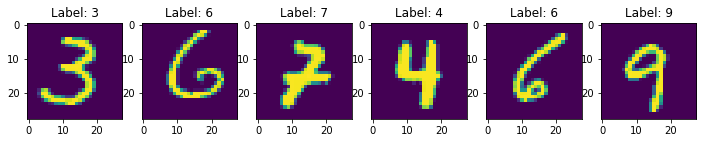

In [32]:
# Plot the train samples
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,6, figsize = (12, 8))

for i in range(6):
  index = np.random.randint(0, len(X_train))
  ax[i].imshow(X_train[index])
  ax[i].set_title(f'Label: {y_train[index]}')

plt.show()

## Build the tf.keras.Sequential model by stacking layers:

In [0]:
# model construction: create the Deep NN:
def create_model():
  model = tf.keras.models.Sequential([
                                      # INPUT layer convert data from (28,28) to 1D array
                                      tf.keras.layers.Flatten(input_shape =(28,28)), 
                                      # Hidden layer: Using relu 
                                      tf.keras.layers.Dense(128,activation = 'relu'), 
                                       # The next layer will have 20% less node than the privious one To avoid overfit
                                      tf.keras.layers.Dropout(0.2),
                                      # OUTPUT layer has 10 nodes (10 numbers to predict) and softmax for milti-classification
                                      tf.keras.layers.Dense(10, activation ='softmax') 
                                      ])
  # compile and train
  model.compile(optimizer = 'Adam', 
                # differ to cross entropy not require the label y in one-hot encoding type.
                loss = 'sparse_categorical_crossentropy', 
                metrics = ['accuracy'])
  return model
model = create_model()

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Build the tf.keras.Sequential model by stacking layers. Choose an optimizer and loss function for training:

In [34]:
# Train the model with Train data
history = model.fit(X_train, y_train,verbose=2, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 - 4s - loss: 0.2981 - accuracy: 0.9124 - val_loss: 0.1534 - val_accuracy: 0.9533
Epoch 2/10
1875/1875 - 3s - loss: 0.1437 - accuracy: 0.9570 - val_loss: 0.0979 - val_accuracy: 0.9692
Epoch 3/10
1875/1875 - 4s - loss: 0.1062 - accuracy: 0.9675 - val_loss: 0.0824 - val_accuracy: 0.9744
Epoch 4/10
1875/1875 - 4s - loss: 0.0881 - accuracy: 0.9724 - val_loss: 0.0761 - val_accuracy: 0.9760
Epoch 5/10
1875/1875 - 4s - loss: 0.0748 - accuracy: 0.9766 - val_loss: 0.0787 - val_accuracy: 0.9755
Epoch 6/10
1875/1875 - 4s - loss: 0.0669 - accuracy: 0.9784 - val_loss: 0.0683 - val_accuracy: 0.9790
Epoch 7/10
1875/1875 - 4s - loss: 0.0591 - accuracy: 0.9811 - val_loss: 0.0682 - val_accuracy: 0.9773
Epoch 8/10
1875/1875 - 3s - loss: 0.0514 - accuracy: 0.9836 - val_loss: 0.0669 - val_accuracy: 0.9794
Epoch 9/10
1875/1875 - 3s - loss: 0.0484 - accuracy: 0.9840 - val_loss: 0.0702 - val_accuracy: 0.9804
Epoch 10/10
1875/1875 - 4s - loss: 0.0448 - accuracy: 0.9854 - val_loss: 0.0648 - 

In [35]:
# Check the model 
history

In [36]:
# Check the history of model
history.history

{'accuracy': [0.9124333262443542,
  0.95701664686203,
  0.9674666523933411,
  0.9724000096321106,
  0.9766499996185303,
  0.9783833622932434,
  0.981083333492279,
  0.9836166501045227,
  0.9840333461761475,
  0.9854333400726318],
 'loss': [0.29808899760246277,
  0.14371253550052643,
  0.10622556507587433,
  0.08805789053440094,
  0.07477828860282898,
  0.06692733615636826,
  0.05911711975932121,
  0.05141086503863335,
  0.048437777906656265,
  0.04480484500527382],
 'val_accuracy': [0.9532999992370605,
  0.9692000150680542,
  0.974399983882904,
  0.9760000109672546,
  0.9754999876022339,
  0.9789999723434448,
  0.9772999882698059,
  0.9793999791145325,
  0.980400025844574,
  0.9807999730110168],
 'val_loss': [0.1534336507320404,
  0.09788590669631958,
  0.08244912326335907,
  0.0760948434472084,
  0.07871285080909729,
  0.06832985579967499,
  0.06823500990867615,
  0.06694897264242172,
  0.0702400803565979,
  0.0647965744137764]}

In [37]:
#evaluate the model with test data
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0648 - accuracy: 0.9808


[0.0647965744137764, 0.9807999730110168]

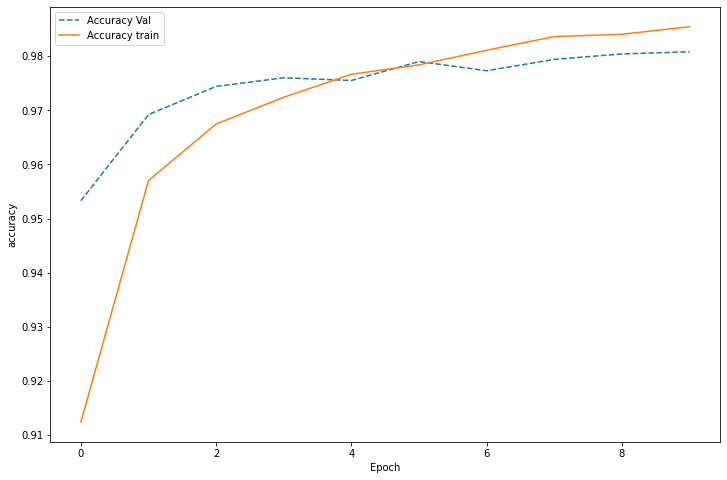

In [49]:
# Visualize model 
def ploth(history,key='loss'):
  plt.figure(figsize=(12,8))
  plt.plot(history.epoch, history.history['val_' +key],'--', label = key.title()+" Val")
  plt.plot(history.epoch, history.history[key], label = key.title() + ' train')
  plt.xlabel('Epoch')
  plt.ylabel(key)
  plt.legend()

ploth(history, key='accuracy')
